In [1]:
!pip list

Package                 Version
----------------------- ------------
absl-py                 2.1.0
asttokens               2.4.1
astunparse              1.6.3
certifi                 2024.8.30
charset-normalizer      3.3.2
colorama                0.4.6
comm                    0.2.2
contourpy               1.3.0
cycler                  0.12.1
debugpy                 1.8.5
decorator               5.1.1
exceptiongroup          1.2.2
executing               2.1.0
filelock                3.13.1
flatbuffers             24.3.25
fonttools               4.54.1
fsspec                  2024.2.0
gast                    0.6.0
google-pasta            0.2.0
grpcio                  1.66.1
h5py                    3.11.0
idna                    3.8
importlib_metadata      8.4.0
importlib_resources     6.4.5
ipykernel               6.29.5
ipython                 8.18.1
jedi                    0.19.1
Jinja2                  3.1.3
jupyter_client          8.6.2
jupyter_core            5.7.2
keras           

In [1]:
import torch

# Check if CUDA is available
if torch.cuda.is_available():
    print("GPU is available")
    # Get the name of the GPU
    gpu_name = torch.cuda.get_device_name(0)
    print(f"Using GPU: {gpu_name}")
else:
    print("GPU is not available, using CPU")

GPU is available
Using GPU: NVIDIA GeForce GTX 1650


In [2]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define a transform to normalize the data
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert the image to a tensor
    transforms.Normalize((0.5,), (0.5,))  # Normalize to mean=0.5 and std=0.5
])

# Load the training dataset
train_dataset = datasets.FashionMNIST(root='../data', train=True, download=True, transform=transform)

# Load the test dataset
test_dataset = datasets.FashionMNIST(root='../data', train=False, download=True, transform=transform)

# Create DataLoaders for training and testing
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Example: Iterate through the training data
for images, labels in train_loader:
    print(images.shape)  # Output shape of the batch of images
    print(labels.shape)  # Output shape of the batch of labels
    break  # Just to see one batch


torch.Size([64, 1, 28, 28])
torch.Size([64])


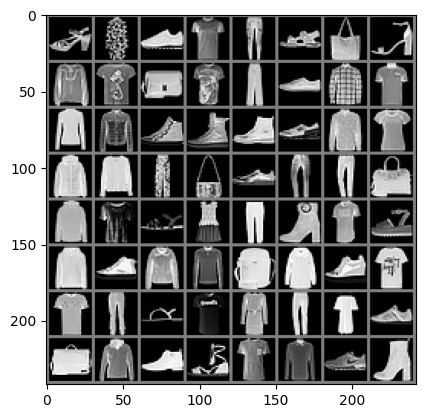

In [4]:
import matplotlib.pyplot as plt #type:ignore
import numpy as np
import torchvision

# Function to unnormalize and display the image
def imshow(img):
    # Unnormalize the image
    img = img / 2 + 0.5  # Unnormalize: reverse the mean=0.5, std=0.5 normalization
    npimg = img.numpy()  # Convert to numpy array
    plt.imshow(np.transpose(npimg, (1, 2, 0)))  # Rearrange dimensions for plotting (C, H, W) -> (H, W, C)
    plt.show()

# Get a batch of training data
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Show images
imshow(torchvision.utils.make_grid(images))  # Display the first batch of images as a grid


In [5]:
import torch.nn as nn
import torch.optim as optim

# Define a simple feed-forward neural network
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)  # Input layer
        self.fc2 = nn.Linear(128, 64)       # Hidden layer
        self.fc3 = nn.Linear(64, 10)        # Output layer (10 classes for FashionMNIST)

    def forward(self, x):
        x = x.view(x.shape[0], -1)  # Flatten the image
        x = torch.relu(self.fc1(x))  # First layer with ReLU
        x = torch.relu(self.fc2(x))  # Second layer with ReLU
        x = self.fc3(x)              # Output layer
        return x

# Instantiate the model
model = SimpleNet()

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()  # Since it's a classification task
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [6]:
# Training the model
epochs = 5  # Number of epochs to train for

for epoch in range(epochs):
    running_loss = 0.0
    for images, labels in train_loader:
        # Zero the parameter gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        
        # Print statistics
        running_loss += loss.item()
    print(f"Epoch [{epoch + 1}/{epochs}], Loss: {running_loss / len(train_loader)}")


Epoch [1/5], Loss: 0.5120908535047889
Epoch [2/5], Loss: 0.37526389483068545
Epoch [3/5], Loss: 0.3389681009675013
Epoch [4/5], Loss: 0.31637866343897797
Epoch [5/5], Loss: 0.2987941806472695


In [7]:
# Evaluation
correct = 0
total = 0
with torch.no_grad():  # Disable gradient calculation for evaluation
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)  # Get the class with the highest score
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy: {100 * correct / total}%")


Test Accuracy: 87.24%


In [22]:
# Save only the state_dict (recommended)
torch.save(model, '../model/simplenet_full.pth')

C:\Users\jatin\AppData\Local\Temp\ipykernel_9456\1917097136.py:16: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load('../model/simplenet_full.pth')


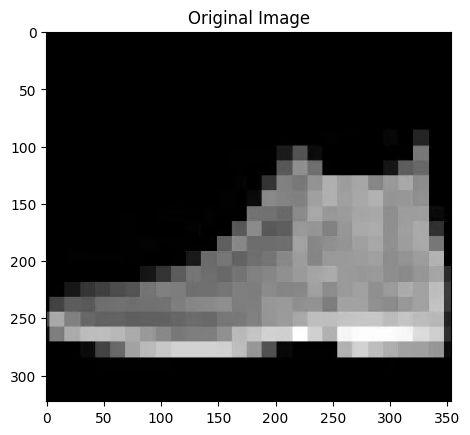

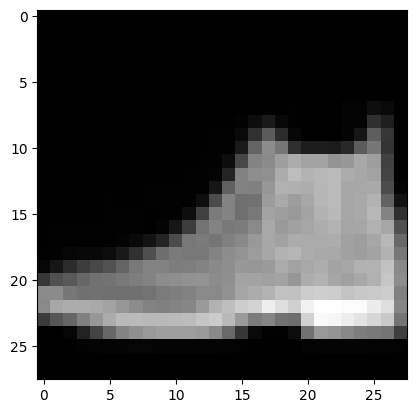

Predicted label: 9 (Ankle boot)


In [49]:
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Define the same transform as used during training
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # Convert image to grayscale if it's not
    transforms.Resize((28, 28)),  # Resize the image to match the dataset size
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalization used in training
])

# Load the model
model = torch.load('../model/simplenet_full.pth')
model.eval()  # Set to evaluation mode

# Function to show the image
def show_image(img):
    img = img / 2 + 0.5  # Unnormalize the image
    npimg = img.numpy()  # Convert to numpy array
    plt.imshow(np.transpose(npimg, (1, 2, 0)), cmap='gray')  # Show image in grayscale
    plt.show()

# Function to predict the class of a user-provided image
def predict_user_image(image_path):
    # Load the image
    img = Image.open(image_path)
    
    # Show the image before transformation
    plt.imshow(img)
    plt.title('Original Image')
    plt.show()
    
    # Apply the transformation
    img = transform(img)
    
    # Show the transformed image
    show_image(img)
    
    # Add batch dimension
    img = img.unsqueeze(0)  # Add batch dimension
    
    # Forward pass through the model
    with torch.no_grad():  # No need to calculate gradients
        output = model(img)
    
    # Get the predicted class
    _, predicted_class = torch.max(output, 1)
    
    return predicted_class.item()

# Example usage:
image_path = input('Enter image path:')  # Replace this with the actual path to the image
predicted_label = predict_user_image(image_path)

# Map the predicted label to actual class name
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print(f"Predicted label: {predicted_label} ({classes[predicted_label]})")
